# DENGUE Tutorial

Following a [research](https://www.fiemg.com.br/wp-content/uploads/2024/03/Impactos-Economicos-Arboviroses-somente-efeito-induzido.pdf) by FIEMG, we arrived at a potential relation of cases of dengue in Brazil and economic loss. In the research we could correlate a total of 4.2 million infected people to a loss of 20.3 billions of reais, between decline in productivity and health costs.

So we took data from Datasus from the year of 2023, where we had 1048575 registered cases of dengue. That should imply 5068112500 reais or 913173423 dollars (with 1 dollar equals to 5.55 reais) in economic loss. We then created the DengueFunc.xlsx file which with the cases from datasus should bring us close to the desired impact which was 913 million dollars.

You can see the process done in the following cells.

**Before this you should read our README.md in the doc/ClimadaBR_docs/ directory, copies of our source files are there too so take and put them in the climada SYSTEM_DIR, so that the code works (the README.md also has an explanation of how to do it).**

The files needed are:
- gpw-v4-population-count-rev11_2020_30_sec_tif foulder
- DENGUE2023.xlsx
- municipios.csv
- DengueFunc.xlsx

# Step 1. Creating the ClimadaBR object

Here we create the climadabr object passing only the impact function file, cause we need to use another method to read the datasus file, different from the standard one.

In [2]:
import warnings
warnings.filterwarnings('ignore') # Makes the results cleaner

%matplotlib inline
from climada.climadaBR import *

# For this cell to work we need the gpw-v4-population-count-rev11_2020_30_sec_tif foulder.
# You can find out more about it in the LitPop tutorial. After downloading, you need to copy it to the system
# directory.
climadabr = ClimadaBR(None, "DengueFunc2.xlsx")

Defining Exposure
2025-02-24 17:00:24,743 - climada.entity.exposures.litpop.litpop - INFO - 
 LitPop: Init Exposure for country: BRA (76)...

2025-02-24 17:00:34,525 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2025-02-24 17:00:34,526 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2025-02-24 17:00:34,599 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2025-02-24 17:00:34,601 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2025-02-24 17:00:34,711 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2025-02-24 17:00:34,712 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2025-02-24 17:00:34,737 - climada.entity.exposures.litpop.gpw_population - WARNING - Referenc

# Step 2. Setting the Hazard

This datasus file is different from the ones we generated from news articles so it needs a different processing method, for that we are going to use the Set_Datasus_Hazard() method.

In [3]:
climadabr.Set_Datasus_Hazard('DENGUE2023.xlsx', by_month_only=False, minimum_cases=50)

Defining Hazard
Creating Hazard Dataframe: |██████████████████████████████████████████████████| 100.0% Complete
Creating Hazard Object: |██████████████████████████████████████████████████| 100.0% Complete


# Step 3. Check the results

The final step is the same as from the other tutorial, so you can use those methods check the results. The only method that will not work here is the haz_reg.Results_Plots(), because there is no regularization being done in this file.

We can observe here that we get 912684154 dollars of impact which is close to the 913 million like we wanted, so now we can use this impact function along with data from news articles and to see if the results can get close to what really happened. We will show it in the next cells.

Computing Impact
2025-02-24 17:02:07,206 - climada.entity.exposures.base - INFO - Matching 101818 exposures with 964 centroids.
2025-02-24 17:02:07,211 - climada.util.coordinates - INFO - No exact centroid match found. Reprojecting coordinates to nearest neighbor closer than the threshold = 100
2025-02-24 17:02:07,318 - climada.util.coordinates - WARNING - Distance to closest centroid is greater than 100km for 48852 coordinates.
2025-02-24 17:02:07,323 - climada.engine.impact_calc - INFO - Calculating impact for 158313 assets (>0) and 2465 events.
2025-02-24 17:02:07,337 - climada.util.coordinates - INFO - Setting geometry points.
2025-02-24 17:02:07,361 - climada.util.coordinates - INFO - Raster from resolution 0.08333332999999854 to 0.08333332999999854.
The impact of 2465 groups of events were analised across 964 different locations.
The events were grouped by month and location.
The results calculated by climada are the following:
Aggregated average annual impact calculated: 9126841

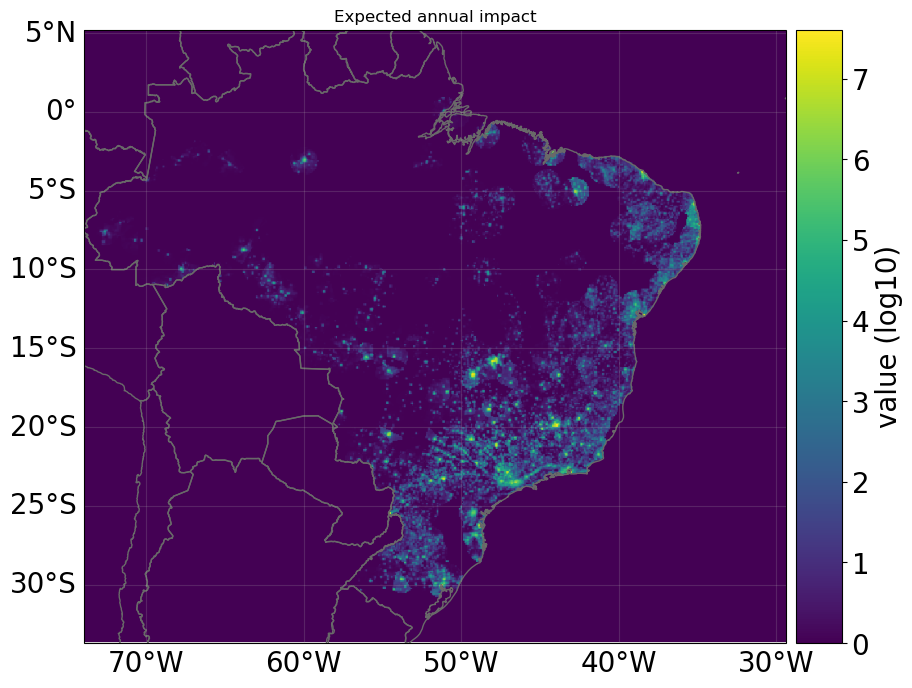

In [4]:
climadabr.ComputeImpact()
climadabr.Results()

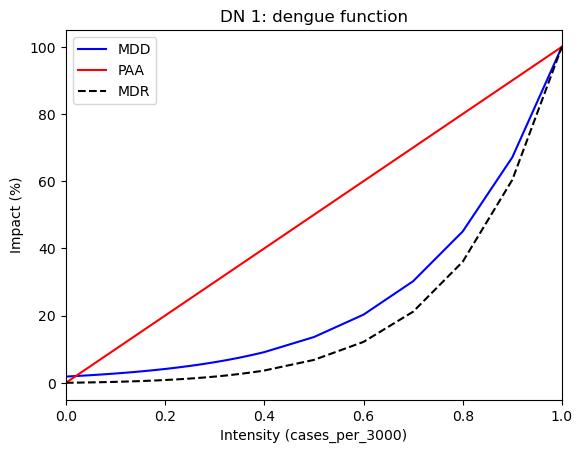

In [5]:
climadabr.Plot_ImpFun()